In [105]:
import os
from time import time
from PIL import Image, ImageEnhance
import numpy as np
from utils import helpers

np.set_printoptions(edgeitems=10)

In [2]:
# setup net from base weights
net, img_transforms, args = helpers.setup_net('../models/kitti_best.pth')

Using regular batch norm
Net built.
Net restored.


In [3]:
# setup net from generated training model
# net, img_transforms, args = helpers.setup_net('gen_models/best_epoch_1_mean-iu_0.73394.pth')

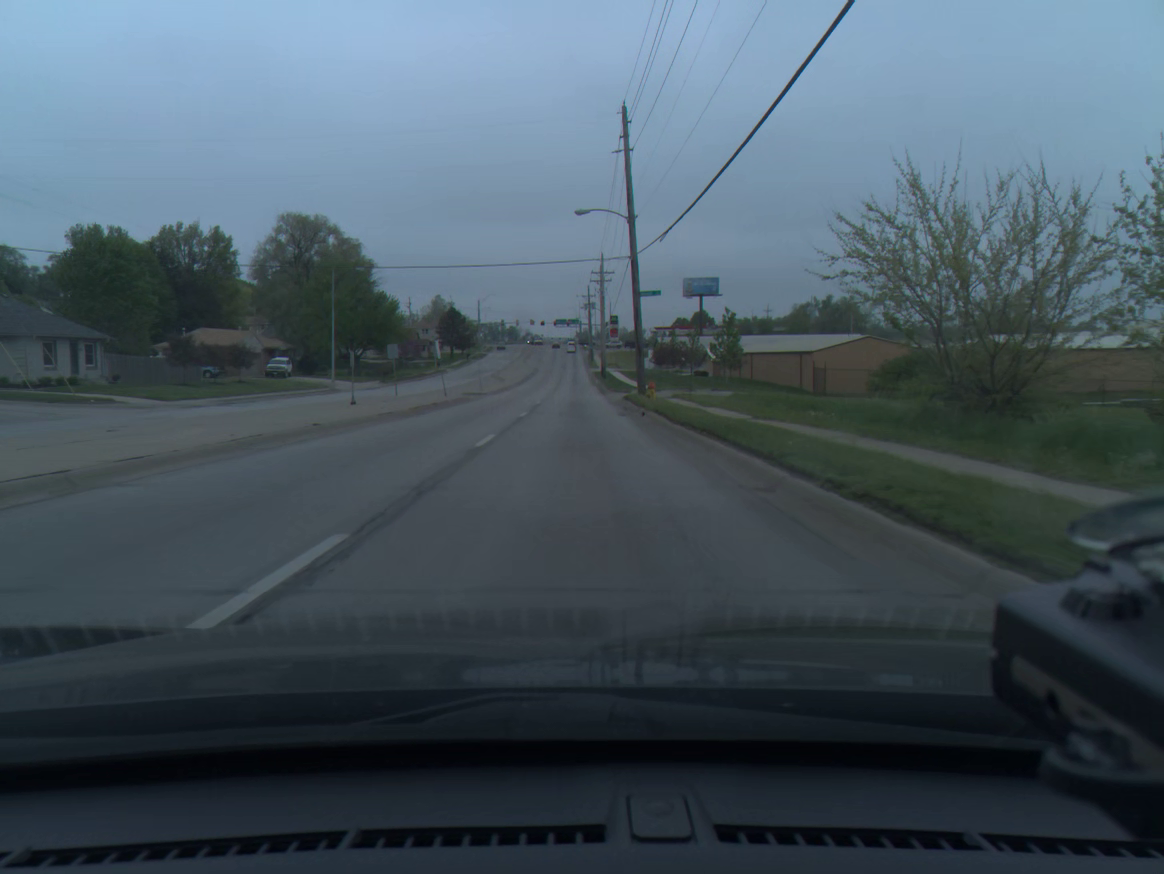

In [141]:
img_dir = 'comma10k/imgs'
segz_dir = 'comma10k/segz'
ims = os.listdir(img_dir)
x = Image.open(os.path.join(img_dir, ims[5]))
x_np = np.array(x)

# contrast = ImageEnhance.Contrast(x)
# enhanced = contrast.enhance(0.9)
# x = enhanced
# x_np = np.array(enhanced)

x

In [142]:
# predict image & get average time inference
# dt = time()
# N_predictions = 10
# for _ in range(N_predictions):
#     p_color, p = helpers.predict_image(net, img_transforms, args, x_np)
# dt = time() - dt

p_color, p = helpers.predict_image(net, img_transforms, args, x_np)

In [6]:
# avg_one_img = dt / N_predictions
# print('Average inference time: %.6fs per image.' % avg_one_img)

NameError: name 'dt' is not defined

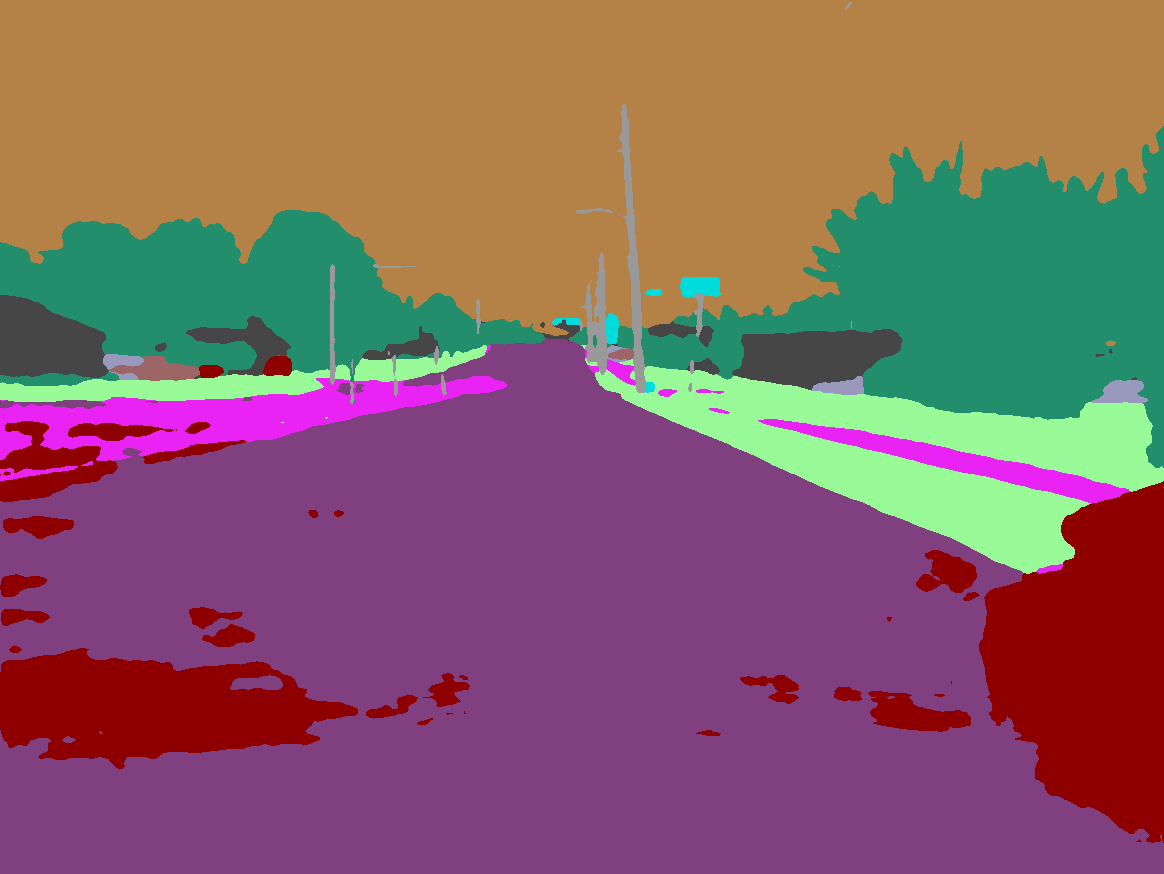

In [143]:
# Image segmentation prediction
p_pred = Image.fromarray(p_color)
p_pred

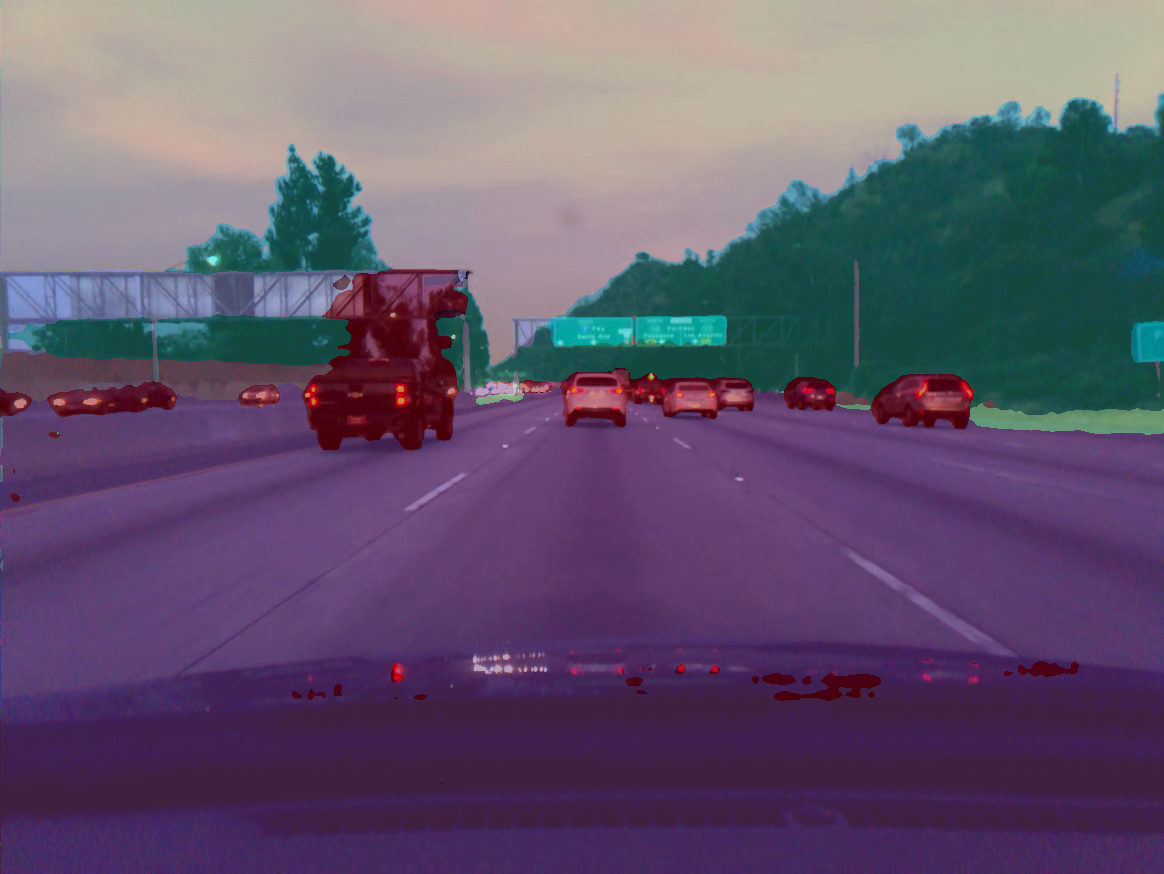

In [127]:
# Image segmentation over subject image
p_masked = Image.fromarray(x_np + p_color)
p_masked

background = Image.fromarray(x_np)
foreground = Image.fromarray(p_color)
foreground.putalpha(128)
background.paste(foreground, (0, 0), foreground)
background

In [ ]:
# The predicted classes for individual pixels,specifically for the edges
print(p)

In [ ]:
# Show all existing classes in given image
uniq_labels = set(p.flatten())
print("All unique labels in given image: {}".format(uniq_labels))

In [ ]:
# run these commands for training

# !rm kitti_tile300_cv2_train_hardnm0.json
# !rm -rf logs
# !sh "scripts/train_commakitti_WideResNet38.sh"